<h1>Machine learning algorithms.<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear regression</a></span><ul class="toc-item"><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Hypothesis</a></span></li><li><span><a href="#Cost-function---Mean-squared-error" data-toc-modified-id="Cost-function---Mean-squared-error-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cost function - Mean squared error</a></span></li><li><span><a href="#Gradient-descent" data-toc-modified-id="Gradient-descent-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Gradient descent</a></span></li><li><span><a href="#Feature-scaling-and-mean-normalization" data-toc-modified-id="Feature-scaling-and-mean-normalization-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Feature scaling and mean normalization</a></span></li><li><span><a href="#Normal-equasion" data-toc-modified-id="Normal-equasion-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Normal equasion</a></span></li></ul></li><li><span><a href="#Linear-regression-examples" data-toc-modified-id="Linear-regression-examples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear regression examples</a></span><ul class="toc-item"><li><span><a href="#Plot-hypothesis" data-toc-modified-id="Plot-hypothesis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot hypothesis</a></span></li><li><span><a href="#Mean-squared-error-implementation" data-toc-modified-id="Mean-squared-error-implementation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mean squared error implementation</a></span></li><li><span><a href="#Plot-different-hypothesis-and-mean-squared-errors" data-toc-modified-id="Plot-different-hypothesis-and-mean-squared-errors-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot different hypothesis and mean squared errors</a></span></li><li><span><a href="#Plot-mean-squared-error-for-univariable-hypothesis" data-toc-modified-id="Plot-mean-squared-error-for-univariable-hypothesis-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot mean squared error for univariable hypothesis</a></span></li><li><span><a href="#Plot-mean-squared-error-for-multivariable-hypothesis" data-toc-modified-id="Plot-mean-squared-error-for-multivariable-hypothesis-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot mean squared error for multivariable hypothesis</a></span></li></ul></li></ul></div>

# Linear regression

n - number of features <br>
m - number of training examples <br>
$x^{(i)}$ - $i^{th}$ input variable <br>
$y^{(i)}$ - $i^{th}$ output variable

## Hypothesis

Parameters: <br>
&emsp; $\theta_0, \theta_1,...\theta_n = \theta$ <br><br>
Hypothesis: <br>
&emsp; $h_\theta(x) = \theta_0x_0+\theta_1x_1+...+\theta_nx_n = \theta^Tx$ &emsp; for $x_0=1$<br><br>
Vectorized hypothesis: <br>
&emsp; $y_{predicted} = X\theta$

## Cost function - Mean squared error

Cost function: <br>
&emsp; $J(\theta) = \frac{1}{2m} \sum \limits _{i=1} ^m (h_\theta(x^{(i)})-y^{(i)})^2$ <br><br>
Vectorized cost function: <br>
&emsp; $J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y)$

## Gradient descent

Gradient descent algorithm: <br>
&emsp; $\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)$ <br>
&emsp;$\theta_j := \theta_j - \alpha \frac{1}{m} \sum \limits _{i=1} ^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$ &emsp; for j=0...n,  $x_0=1$ <br><br>
Vectorized gradient descent: <br>
&emsp; $\theta = \theta - \alpha \frac{1}{m} ((X\theta - y)^T X)^T = \theta - \alpha \frac{1}{m} X^T (X\theta - y)$

## Feature scaling and mean normalization

$\mu_i - mean$ <br>
$\sigma_i$ - standard deviation <br><br>
Feature scaling and mean normalization: <br>
&emsp; $x_i = \frac{x_i - \mu_i}{\sigma_i}$ <br><br>
Vectorized feature scaling and mean normalization: <br>
&emsp; $\mu \in \mathbb{R^n}$ <br>
&emsp; $\sigma \in \mathbb{R^n}$ <br>
&emsp; $t \in \mathbb{1}^m$ <br><br>
&emsp; $X_{normalize} = (X - t\mu^T) \oslash (t\sigma^T)$

## Normal equasion

min of $J(\theta) = \frac{\partial}{\partial\theta}J(\theta) = \frac{\partial}{\partial\theta} \frac{1}{2m} \sum \limits _{i=1} ^m (h_\theta(x^{(i)})-y^{(i)})^2 = 0 => \theta = (X^TX)^{-1}X^Ty$ <br>

# Linear regression examples

## Plot hypothesis

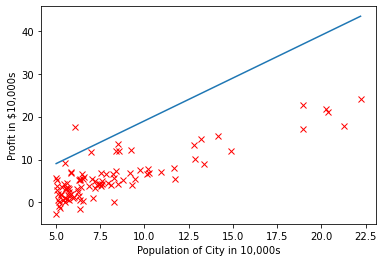

In [1]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('datasets/food_truck.csv', delimiter=',')

X = data[:, 0:1]
y = data[:, 1:2]

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X, y, 'xr')

theta = np.array([[-1], [2]])
min_max = np.array([[np.min(X)], [np.max(X)]])
min_max_with_x0 = np.hstack((np.ones((2,1)), min_max))
pred = min_max_with_x0.dot(theta) 

plt.plot(min_max, pred)

## Mean squared error implementation

In [67]:
def mean_squared_error(X, y, theta):
    m = X.shape[0]
    J = (1/(2*m)) * ((X.dot(theta)-y).T).dot(X.dot(theta)-y)
    return J[0][0]

## Plot different hypothesis and mean squared errors

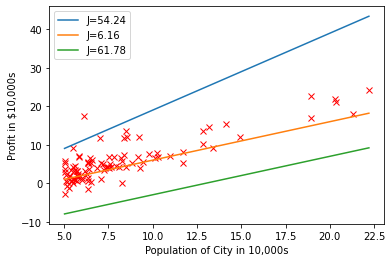

In [66]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('datasets/food_truck.csv', delimiter=',')

m = data.shape[0]
X = np.hstack((np.ones((m, 1)), data[:, 0:1]))
y = data[:, 1:2]

min_max = np.array([[np.min(X[:, 1])], [np.max(X[:, 1])]])
min_max_with_x0 = np.hstack((np.ones((2,1)), min_max))

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:, 1:2], y, 'xr')

thetas = np.array([
    [[-1], [2]],
    [[-4], [1]],
    [[-13], [1]]
])

for theta in thetas:
    J = mean_squared_error(X, y, theta)
    pred = min_max_with_x0.dot(theta)
    label = f"J={np.around(J, 2)}"
    plt.plot(min_max, pred, label=label)

plt.legend()

## Plot mean squared error for univariable hypothesis

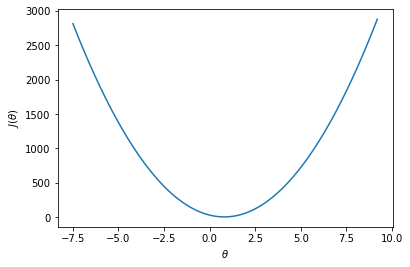

In [72]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('datasets/food_truck.csv', delimiter=',')

X = data[:, 0:1]
y = data[:, 1:2]

theta_vals = np.arange(-7.5,9.25,0.1)
J_vals = []

for theta in theta_vals:
    J = mean_squared_error(X, y, theta)
    J_vals.append(J)

plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')
plt.plot(theta_vals, J_vals)

## Plot mean squared error for multivariable hypothesis

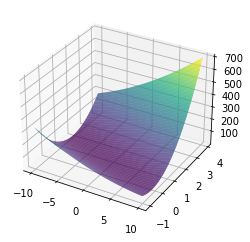

In [73]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('datasets/food_truck.csv', delimiter=',')

m = data.shape[0]
X = np.hstack((np.ones((m, 1)), data[:, 0:1]))
y = data[:, 1:2]

theta0_vals = np.arange(-10, 10,0.1)
theta1_vals = np.arange(-1, 4, 0.1)

J_vals = np.empty((0,200))

for theta1 in theta1_vals:
    J_vals_for_theta1 = np.array([])
    
    for theta0 in theta0_vals:
        theta = np.array([[theta0],[theta1]])
        J = mean_squared_error(X, y, theta)
        J_vals_for_theta1 = np.append(J_vals_for_theta1, J)
       
    J_vals = np.append(J_vals, np.array([J_vals_for_theta1]), axis=0)

Theta0_vals, Theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
    
ax = plt.axes(projection='3d')
ax.plot_surface(Theta0_vals, Theta1_vals, J_vals, rstride=1, cstride=1, cmap='viridis', edgecolor='none')    

In [12]:
a = [1,2,3]
a = np.array(a)
np.append(a,1)
a.shape
np.arange(-1, 4, 0.1).shape

(50,)

(30,)
(40, 30)
(40,)
(40, 30)
(40, 30)


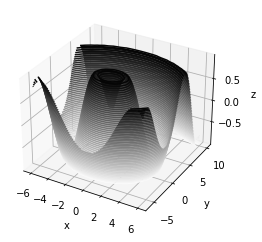

In [39]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 10, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

print(x.shape)
print(X.shape)
print(y.shape)
print(Y.shape)
print(Z.shape)

In [185]:
m = np.shape(X)[0]
X1 = np.hstack((np.ones((m, 1)), X))
theta = np.zeros((2,1))
C = mean_squared_error(X1, y, theta)
C.shape

(1, 1)

In [214]:
a = np.array([[1,2],[3,4],[5,6]])
for x in a:
    print(x)

[1 2]
[3 4]
[5 6]


In [95]:
dataset[:, 1]
https://www.youtube.com/watch?v=QUT1VHiLmmI

SyntaxError: invalid syntax (<ipython-input-95-ff331baf3dbe>, line 2)

In [2]:
import numpy as np
a = np.array([1,2,3])
print(a)

[1 2 3]


In [16]:
b = np.array([[1,2,3],[4,5,6]], dtype='int16')
print(b)

[[1 2 3]
 [4 5 6]]


In [17]:
b.ndim

2

In [18]:
b.shape

(2, 3)

In [19]:
b.dtype

dtype('int16')

In [20]:
b.itemsize

2

In [21]:
b.nbytes

12

In [32]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [33]:
a[1,1]

5

In [34]:
a[0,:]

array([1, 2, 3])

In [35]:
a[:, 0]

array([1, 4, 7])

In [38]:
np.ones((2,3), dtype='int32')

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [3]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
b = a.copy() # zmiana b nie nadpisze a

In [5]:
a * 2

array([2, 4, 6])

In [6]:
np.sin(a)

array([0.84147098, 0.90929743, 0.14112001])

In [11]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[1], [1]])
np.matmul(a, b)

array([[ 3],
       [ 7],
       [11]])

In [19]:
o = np.ones((3,1))
np.hstack((o, a))

array([[1., 1., 2.],
       [1., 3., 4.],
       [1., 5., 6.]])

In [20]:
a > 2

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [21]:
a[a > 2]

array([3, 4, 5, 6])

In [23]:
a[[1,2]]

array([[3, 4],
       [5, 6]])

In [ ]:
https://www.youtube.com/watch?v=3Xc3CA655Y4